In [63]:
import numpy as np
import cv2
import glob
import yaml
from matplotlib import pyplot as plt
import os
import matplotlib.image as mpimg
import time

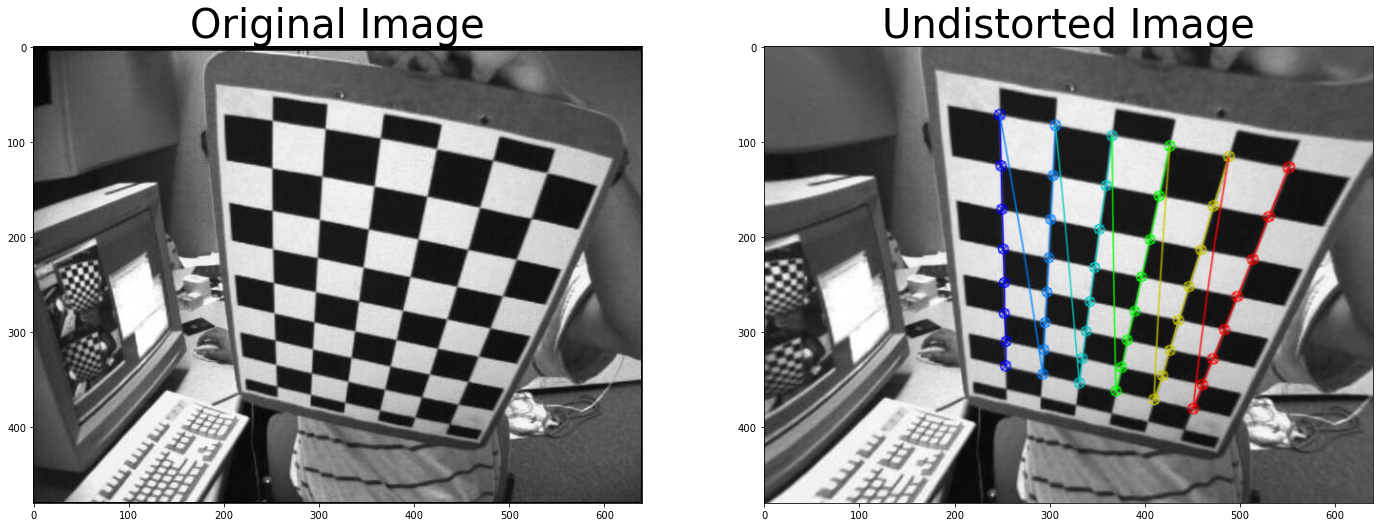

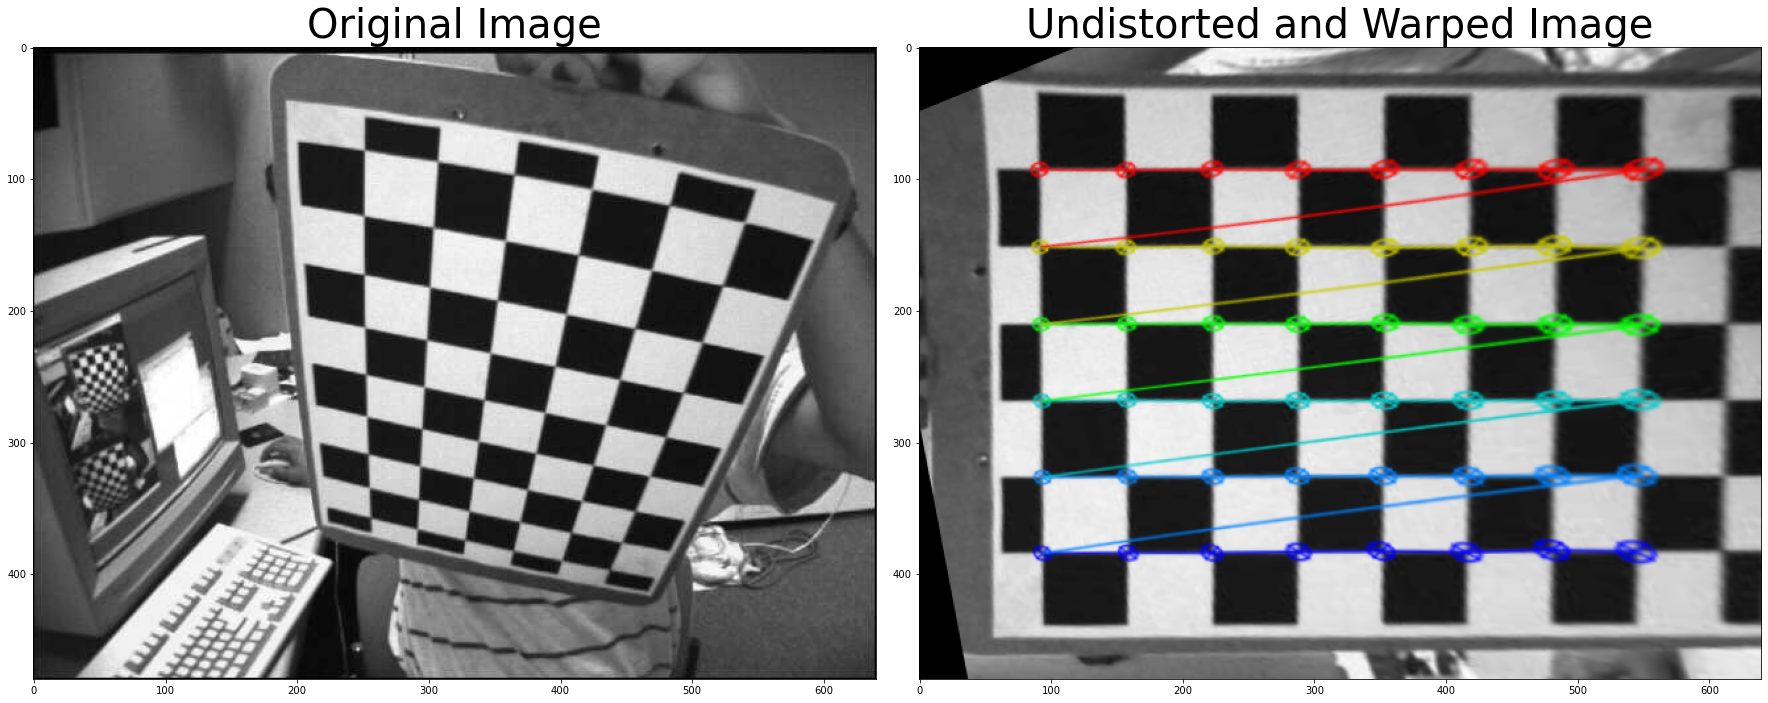

In [59]:
# Ref. paper
# Automatic camera and range sensor calibration using a single shot(2012)

#
# Load the image
#
fname = 'data/left02.jpg'
img  = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#
# Camera Calibration
# 
# Ref.
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
# https://blog.csdn.net/qq_30815237/article/details/87622654

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Prepare object points
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
# retval, corners = cv.findChessboardCorners(image, patternSize[, corners[, flags]]	)

if ret == True:
    # But if we know the square size, (say 30 mm), 
    # we can pass the values as (0,0), (30,0), (60,0)..... etc. in objpoints
    
    objp = np.zeros((ny*nx,3),np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    imgpoints.append(corners)
    objpoints.append(objp)
    
    # image = cv.drawChessboardCorners(image, patternSize, corners, patternWasFound)
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# mtx:   camera matrix
# dist:  distortion coefficients
# rvecs: rotation vectors 
# tvecs: translation vectors

#
# Distortion correction
#
# Ref.
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
#
# We can refine the camera matrix based on a free scaling 
# parameter using cv.getOptimalNewCameraMatrix().

# Use the OpenCV undistort() function to remove distortion
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
f.tight_layout()
img  = cv2.imread(fname)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=40)

f1.savefig('undistorted_image.jpg', dpi= 400)


#
# Perspective Transform
# 
# Ref.
# https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=perspective%20transformation

# Grab the outer four detected corners
# Coordinates of quadrangle vertices in the source image
src = np.float32([corners[-1], corners[-nx], corners[0], corners[nx-1]])

# Matrix for transformed image
offset = 100 # offset for dst points
img_size = (undist.shape[1], undist.shape[0]) # Grab the image shape

# Coordinates of the corresponding quadrangle vertices 
# in the destination image
#  
#   4 < - 3
#         ^     
#         ^   
#   1 - > 2
#
dst = np.float32([[offset, offset], 
                  [img_size[0]-offset, offset], 
                  [img_size[0]-offset, img_size[1]-offset], 
                  [offset, img_size[1]-offset]])

# Given src and dst points, calculate the perspective transform 
M = cv2.getPerspectiveTransform(src, dst)
# e) use cv2.warpPerspective() to warp your image to a top-down view
warped = cv2.warpPerspective(undist, M, img_size)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f.savefig('warped_image.jpg', dpi= 400)

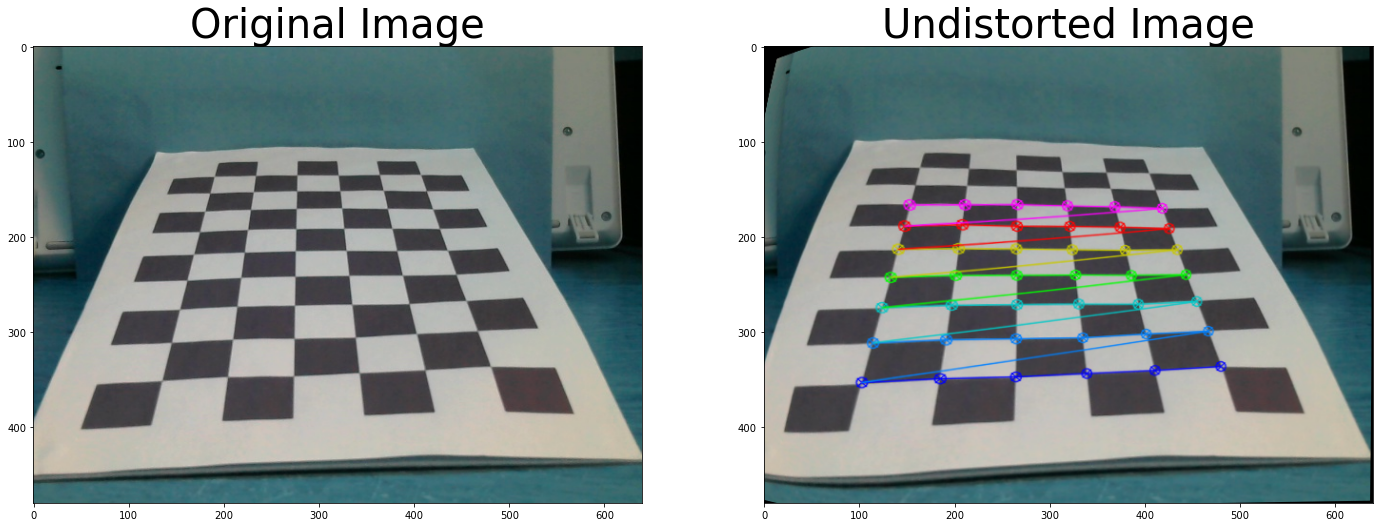

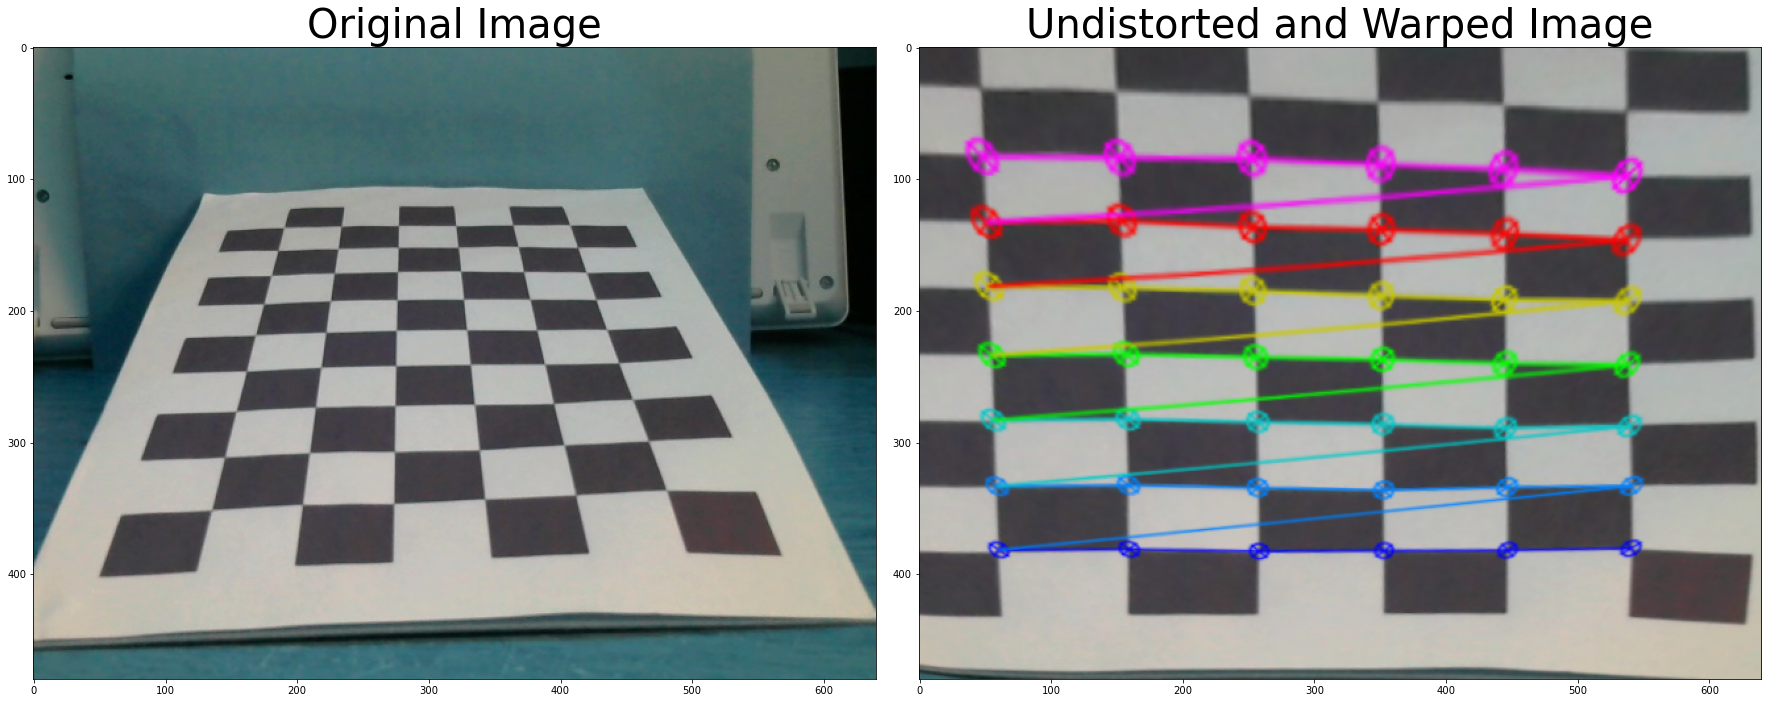

In [102]:
# Another example

now = time.strftime("%Y%m%d%H%M")
#
# Load the image
#
fname = 'test.jpg'
img  = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#
# Camera Calibration
# 
# Ref.
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
# https://blog.csdn.net/qq_30815237/article/details/87622654

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Prepare object points
nx = 6 # the number of inside corners in x
ny = 7 # the number of inside corners in y

ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
# retval, corners = cv.findChessboardCorners(image, patternSize[, corners[, flags]]	)

if ret == True:
    # But if we know the square size, (say 30 mm), 
    # we can pass the values as (0,0), (30,0), (60,0)..... etc. in objpoints
    
    objp = np.zeros((ny*nx,3),np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    imgpoints.append(corners)
    objpoints.append(objp)
    
    # image = cv.drawChessboardCorners(image, patternSize, corners, patternWasFound)
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# mtx:   camera matrix
# dist:  distortion coefficients
# rvecs: rotation vectors 
# tvecs: translation vectors

#
# Distortion correction
#
# Ref.
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
#
# We can refine the camera matrix based on a free scaling 
# parameter using cv.getOptimalNewCameraMatrix().

# Use the OpenCV undistort() function to remove distortion
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
f.tight_layout()
img  = cv2.imread(fname)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=40)

f1.savefig('undistorted_image_{}.jpg'.format(now), dpi= 400)


#
# Perspective Transform
# 
# Ref.
# https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=perspective%20transformation

# Grab the outer four detected corners
# Coordinates of quadrangle vertices in the source image
src = np.float32([corners[-1], corners[-nx], corners[0], corners[nx-1]])

# Matrix for transformed image
offset = 100 # offset for dst points
img_size = (undist.shape[1], undist.shape[0]) # Grab the image shape

# Coordinates of the corresponding quadrangle vertices 
# in the destination image
#  
#   4 < - 3
#         ^     
#         ^   
#   1 - > 2
#
dst = np.float32([[offset, offset], 
                  [img_size[0]-offset, offset], 
                  [img_size[0]-offset, img_size[1]-offset], 
                  [offset, img_size[1]-offset]])

# Given src and dst points, calculate the perspective transform 
M = cv2.getPerspectiveTransform(src, dst)
# e) use cv2.warpPerspective() to warp your image to a top-down view
warped = cv2.warpPerspective(undist, M, img_size)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f.savefig('warped_image_{}.jpg'.format(now), dpi= 400)